In [3]:

import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import calibration_curve
# from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
- 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


100 regions found in this atlas


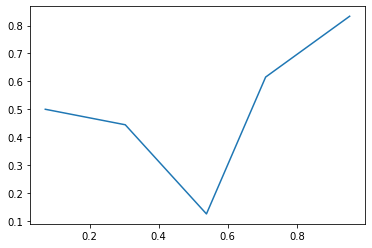

In [22]:
# kf = KFold(n_splits=10)

# # matrix = np.zeros((2,2))
# for train_index, test_index in kf.split(output_variable):
#   X_train, X_test = input_variables[train_index], input_variables[test_index]
#   y_train, y_test = output_variable[train_index], output_variable[test_index]
#   Logmodel = LogisticRegression(penalty='l2',C=1.0).fit(X_train, y_train)
#   log_predict_output = Logmodel.predict_proba(X_test)
#   # matrix += confusion_matrix(y_test, log_predict_output)

Logmodel = LogisticRegression(penalty='l2',C=1.0)
y_pred = cross_val_predict(Logmodel, input_variables, output_variable, cv=10, method = 'predict_proba')
prob_true, prob_pred = calibration_curve(output_variable, y_pred[:,1], n_bins=5)

plt.plot(prob_pred, prob_true)
plt.show()